In [1]:
# memanggil drive google
from google.colab import drive
drive.mount('/content/drives/')

Mounted at /content/drives/


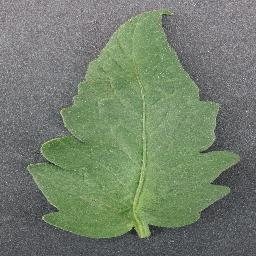

In [11]:

# Baca File Image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('//content/drives/MyDrive/Data/dauntomat.JPG', cv2.IMREAD_UNCHANGED)

# Tampilkan Gambar
cv2_imshow(img)

In [12]:
# Ukuran gambar
print (img.shape)

(256, 256, 3)


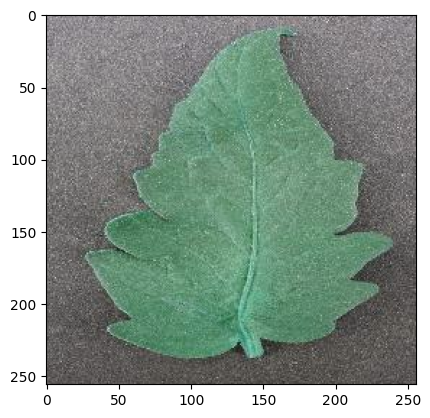

In [13]:

# Tampilkan gambar beserta ukuran
import matplotlib.pyplot as plt #Matplotlib adalah sebuah library Python yang digunakan untuk membuat berbagai macam visualisasi data, mulai dari grafik sederhana hingga visualisasi yang lebih kompleks.
plt.imshow(img)


Penjelasan Singkat matplotlib

Fungsi utama → menampilkan data dalam bentuk grafik 2D (line chart, bar chart, scatter plot, histogram, pie chart, dll).

Modul populer → matplotlib.pyplot yang menyediakan fungsi mirip dengan MATLAB (misalnya plt.plot(), plt.imshow(), plt.bar()).

Integrasi → sering digunakan bersama library lain seperti NumPy, Pandas, dan OpenCV untuk analisis data, machine learning, dan pengolahan citra.

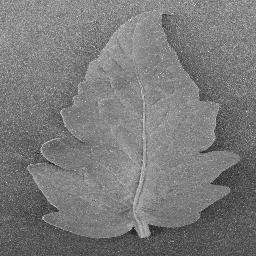

In [14]:

# Ubah gambar ke grayscale
img = cv2.imread('/content/drives/MyDrive/Data/dauntomat.JPG', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

Fungsi Grayscale pada Pengolahan Citra

Grayscale adalah proses konversi citra berwarna (RGB) menjadi citra dengan satu kanal intensitas (hitam–putih/abu-abu).

Setiap piksel pada citra grayscale hanya memiliki 1 nilai intensitas (0–255).

0 = hitam, 255 = putih, dan nilai di antaranya adalah abu-abu.

Mengapa Perlu Grayscale?

Menyederhanakan perhitungan → gambar warna punya 3 kanal (R, G, B), sedangkan grayscale hanya 1 kanal.

Efisien → lebih cepat untuk analisis fitur, misalnya deteksi tepi, thresholding, segmentasi.

Mengurangi noise warna → fokus pada pola intensitas.

In [26]:

# Lihat ukuran gambar
print (img.shape)

(256, 256)


In [17]:

# SImpan Gambar
cv2.imwrite('/content/drives/MyDrive/Data/dauntomatgray.JPG',img)

#jika True maka benar jika false maka salah

True

Mask Histogram

Histogram sebagai grafik atau plot, yang memberi gambaran keseluruhan tentang distribusi intensitas gambar. Plot bernilai pixel (mulai dari 0 hingga 255, tidak selalu) dalam sumbu X dan jumlah piksel yang sesuai pada gambar pada sumbu Y.

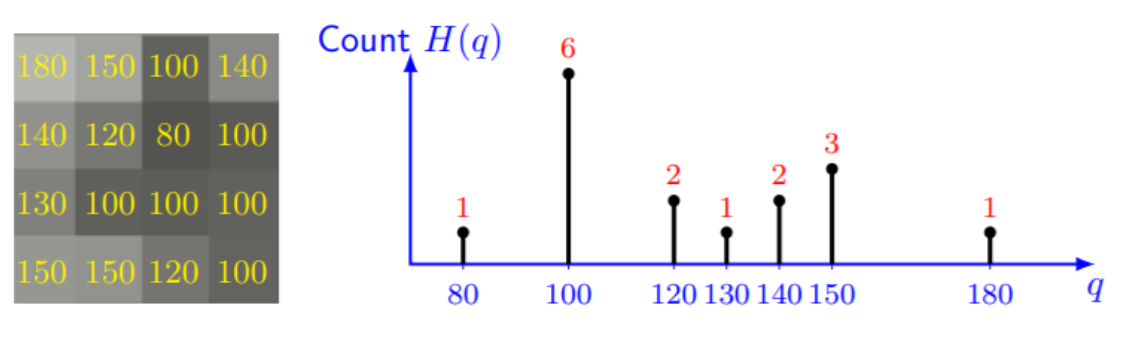


PLOTING HISTOGRAM DENGAN MATPLOTLIB
plt.hist(img_vec, bins = 256, color, alpha)
img_vec: vektor image yang akan di buat grafik, img.ravel() perintah memberi vektor berisi semua piksel gambar yang tersusun

color: Ini adalah warna yang ingin gunakan untuk merencanakan histogram. Secara default, ini berwarna biru tua. Anda dapat menentukannya sebagai Merah, Biru, Hijau, Kuning, agenta, atau warna standar lainnya.

bins: Ini adalah jumlah batang yang ingin kami tampilkan pada sumbu X. Kita tahu bahwa intensitas piksel berkisar dari 0 hingga 255, dan jika kita ingin memvisualisasikan secara terpisah jumlah piksel untuk setiap intensitas yang mungkin, kita memerlukan grafik yang menunjukkan interval 0-255 sebagai 256 batang terpisah. Oleh karena itu, kita akan menyimpan bins = 256. Jika Anda tidak menentukan bins, Python akan memperlakukannya sebagai 10 secara default (dalam contoh berikut, kita akan melihat artinya).

alpha: Ini adalah tingkat transparansi yang ingin Anda gambar histogram.






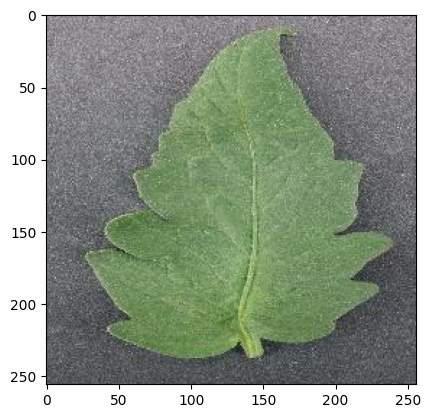

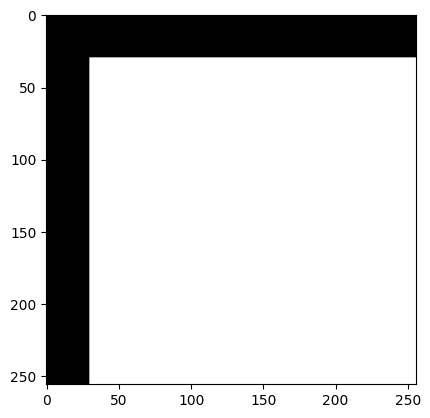

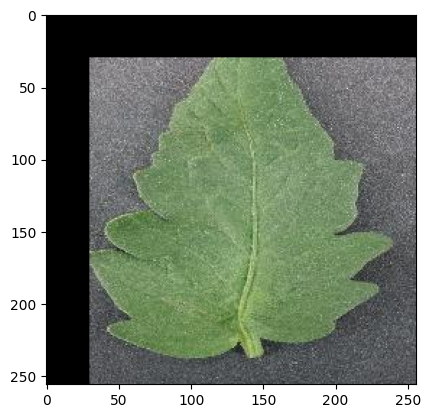

<function matplotlib.pyplot.show(close=None, block=None)>

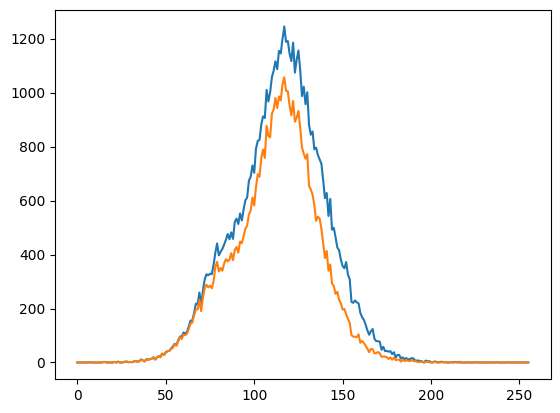

In [25]:
import numpy as np

gbr=cv2.imread('/content/drives/MyDrive/Data/dauntomat.JPG')
# konversi gmbar bgr openCV ke rgb matplotlib
gbr_bgr=cv2.cvtColor(gbr,cv2.COLOR_BGR2RGB)
# tampilkan gbr_bgr
plt.imshow(gbr_bgr)
plt.show()

# buat mask
mask=np.zeros(gbr.shape[:2], np.uint8)
mask[30:400, 30:400] = 255
# tampilkan mask
plt.imshow(mask,'gray')
plt.show()

# gabungkan gambar dan mask
mask_gbr=cv2.bitwise_and(gbr_bgr, gbr_bgr, mask = mask)
# tampilkan mask_gbr
plt.imshow(mask_gbr)
plt.show()

# lakukan perhitungan histogram untuk gambar dan masuk
hist_bgr=cv2.calcHist([gbr_bgr],[0],None,[256],[0,256])
hist_mask=cv2.calcHist([gbr_bgr],[0], mask, [256],[0,256])

# Tampilkan grafik histogram gambar dan masuk
plt.plot(hist_bgr)
plt.plot(hist_mask)
plt.show

Gambar yang ditampilkan merupakan histogram citra digital yang menggambarkan distribusi intensitas piksel. Sumbu horizontal menunjukkan nilai intensitas dari 0 hingga 255, sedangkan sumbu vertikal menunjukkan jumlah piksel pada setiap tingkat intensitas. Terlihat dua kurva, yaitu kurva biru dan oranye, yang menunjukkan perbandingan antara histogram citra asli dengan citra hasil pemrosesan. Distribusi intensitas terkonsentrasi pada rentang sekitar 100 hingga 150, dengan puncak tertinggi berada di sekitar nilai 120. Hal ini menunjukkan bahwa citra didominasi oleh tingkat kecerahan sedang (abu-abu), bukan terlalu gelap maupun terlalu terang. Kurva biru memiliki puncak lebih tinggi, menandakan bahwa pada citra asli terdapat lebih banyak piksel dengan intensitas tertentu. Sementara itu, kurva oranye lebih rendah namun lebih menyebar, yang biasanya mengindikasikan adanya proses peningkatan kualitas gambar, seperti histogram equalization atau filter kontras. Secara keseluruhan, histogram ini menunjukkan bahwa citra asli memiliki distribusi intensitas yang sempit, sedangkan citra hasil pemrosesan lebih merata sehingga tampak lebih seimbang dalam hal kecerahan.